# Maximum Independent Set

or

**Let's use Quantum computers to solve optimization problems!**

---

## Before we start

Don't hesitate to ask me to go faster or slower!

Find this notebook at https://github.com/pasqal-io/quantum-summer-lab-2025/.

Any question, now or later? We have a Slack: https://join.slack.com/t/pasqal-community/shared_invite/zt-3c7awg903-F7RYBucMMj~bZkUkoXeklQ .

## Today's menu

1. From research to industry.
2. Introduction to Maximum Independent Set.
3. Using Maximum Independent Set to solve real-world problems.
4. A quick glimpse behind the Quantum curtain.

---

## From research to industry

### About Pasqal

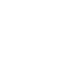

- We build (and ship!) Quantum Computers (aka QPUs).
- We currently ship _analog_ QPUs
    - ... and sell QPU time.
    - ... and write software to exploit QPUs.

### About the Pasqal Open-Source Community

- Much quantum software to this day is _theoretical_.
    - Not meant to be usable on commercial Quantum Computers.
    - Written by quantum computing researchers for quantum computing researchers.
- We're aiming to change this.
    - Our software runs on QPUs (or emulators).
    - We're adapting researcher's work for general use.
- Open-source.
- [https://community.pasqal.com](https://community.pasqal.com)

### about:speaker

![a customized portrait of the speaker.png](about-speaker.png)


---

## It starts with graphs

Graphs are all the rage!

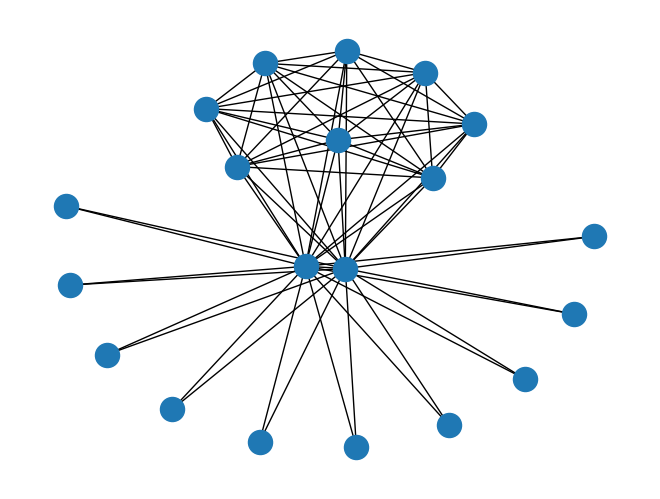

In [29]:
import networkx as nx

example_graph = nx.Graph()
CLIQUE_NODES = [f"clique_{i}" for i in range(10)]
INDIVIDUAL_NODES = [f"individual_{i}" for i in range(10)]

example_graph.add_nodes_from(CLIQUE_NODES)
example_graph.add_nodes_from(INDIVIDUAL_NODES)

for i, node in enumerate(CLIQUE_NODES):
    for node_2 in CLIQUE_NODES[i+1:]:
        example_graph.add_edge(node, node_2)

for node in INDIVIDUAL_NODES:
    example_graph.add_edge(CLIQUE_NODES[0], node)
    example_graph.add_edge(CLIQUE_NODES[1], node)

nx.draw_kamada_kawai(example_graph)

A few applications of graphs:

- represent molecules;
- represent roads;
- represent dependencies;
- represent _conflicts_.

### Maximum Independent Set (MIS)

It starts with a graph $G=(V, E)$. Each node is a possible action to take. Two nodes are connected if they are in _conflict_.

**Independent Set** Given an undirected graph $G=(V, E)$, a set of nodes $V' \subseteq V$ is _independent_ in $G$ if $V'^2 \cap E = \empty$.

Or: an **Independent Set** is a set of non-conflicting actions.

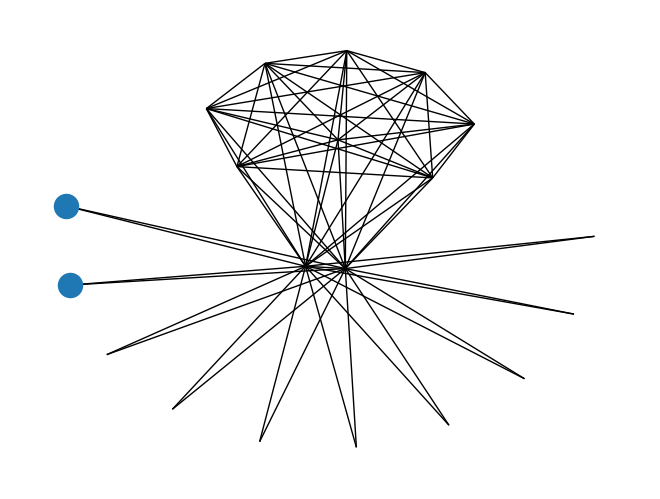

In [30]:
nx.draw_kamada_kawai(example_graph, nodelist=[INDIVIDUAL_NODES[0], INDIVIDUAL_NODES[1]])

**MaximAL Independent Set** Given a graph $G=(V, E)$, a set of nodes $V'$ is a MaximAL Independent Set if there is no $V''$ such that satisfies all of:
- $V' \subsetneq V''$
- $V'' \subseteq V$
- $V''$ is independent in $G$.

Or: a **MaximAL Independent Set** is a set of non-conflicting actions that you can't grow without triggering a conflict.

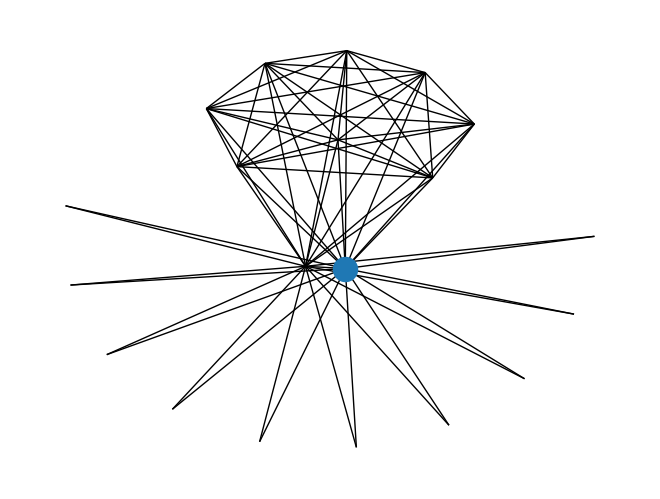

In [19]:
nx.draw_kamada_kawai(example_graph, nodelist=[CLIQUE_NODES[0]])


**MaximUM Independent Set** (MIS) Given a graph $G=(V, E)$, a set of nodes $V'$ is a MaximUM Independent Set if there is no $V''$ such that satisfies all of:
- $|V''| > |V'|$
- $V''$ is independent in $G$.

Or: a **Maximum Independent Set** is a largest set of non-conflicting actions, i.e. a "best solution".

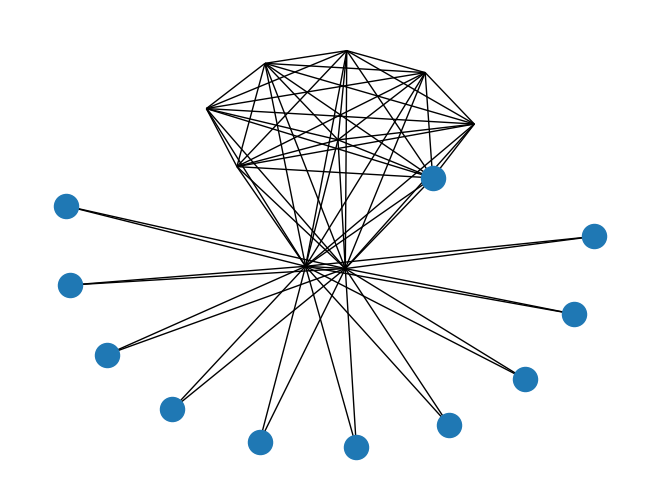

In [28]:
import itertools
nx.draw_kamada_kawai(example_graph, nodelist=list(itertools.chain(INDIVIDUAL_NODES, [CLIQUE_NODES[2]])))

See also: Weighted Maximal/Maximum Independent Set.

### Applications

- Scheduling industrial processes (factory workflows, satellite launches, taxis, exams...)
- Symbolic Artificial Intelligence, Theorem Proving, Static Application Security Testing
- Circuit Design
- Compiler Optimizations (register allocation), Graph Coloring
- Solving puzzles (logical puzzles, sudoku, ...)
- Dependendency management (software packages, ...)
- ...

### What about Quantum?

Solving MIS is $O(3^{\frac{n}{3}})$, i.e. _it quickly grows untractable_.

Quantum can run many instances (not all) in _polynomial time_, i.e. exponentially faster.

Part of the work is experimenting to determine whether we're in a good instance or how to pre-/post-process the graph to make it happen.

---

## Tech setup

You will need:

1. Python 3.8+
2. Either Visual Studio Code or some other mean to open a Jupyter Notebook
3. This notebook

### Download the notebook

#### If you have git

```sh
$ cd YOUR_FAVORITE_DIRECTORY
$ git clone https://github.com/pasqal-io/quantum-summer-lab-2025/
```

#### If you don't

1. Open your browser at `https://github.com/pasqal-io/quantum-summer-lab-2025/`
2. Navigate to `training-mis/maximum-independent-set.ipynb`.
3. Save the file.


### Starting

1. Open Visual Studio Code.
2. Install extension [Jupyter](https://marketplace.visualstudio.com/items?itemName=ms-toolsai.jupyter).
3. Open `maximum-independent-set.ipynb` (this file).

In [1]:
# Let's install the dependencies.

%pip install maximum-independent-set==0.2.1

Note: you may need to restart the kernel to use updated packages.


---

## Graphs as conflicts

1. I have access to Python `3.9`, `3.10`, `3.11`, `3.12`, `3.13`.
2. I need package `mygreatlib` and package `anotherlib`.
3. Package `mygreatlib` conflicts with Python `3.11` or Python `3.12`.
4. Package `anotherlib` conflicts with Python `3.9` and Python `3.12`.

Can I find a solution?

Spoiler: yes.

> ### Your turn
>
> 1. Draw this list of constraints into a graph of conflicts.
> 2. Create a `networkx` graph to represent it.
> 3. Draw it.

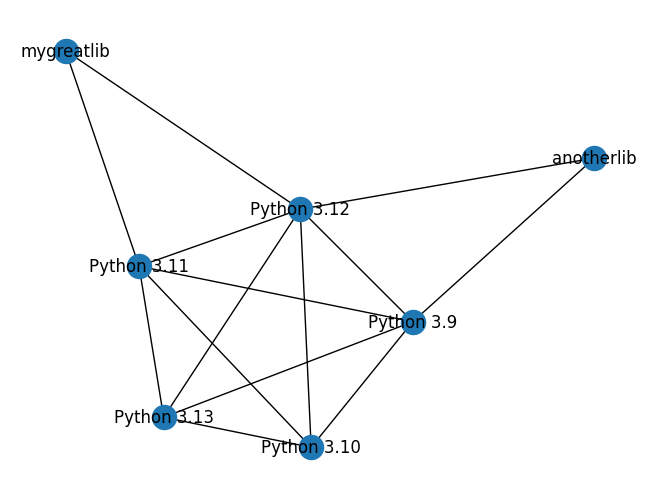

In [ ]:
import networkx as nx

graph = nx.Graph()
PYTHON_VERSIONS = ["Python 3.9", "Python 3.10", "Python 3.11", "Python 3.12", "Python 3.13"]
graph.add_nodes_from(PYTHON_VERSIONS)
graph.add_nodes_from(["mygreatlib", "anotherlib"])

for i, v in enumerate(PYTHON_VERSIONS):
    for w in PYTHON_VERSIONS[i+1:]:
        graph.add_edge(v, w)

# YOUR TASK: Add the missing edges of the graph using `graph.add_edge`.

nx.draw_spring(graph, with_labels=True)

> ### Your turn
>
> 1. Can you find a Maximum Independent Set (manually)?
> 2. Find one Independent Set that is not a subset of a Maximum Independent Set (manually)?

### Solving this without Quantum

In [3]:
# Maximal independent set?
nx.maximal_independent_set(graph)

['Python 3.10', 'mygreatlib', 'anotherlib']

In [4]:
# Maximum independent set?
nx.approximation.maximum_independent_set(graph)

{'Python 3.10', 'anotherlib'}

> ### Your turn
>
> 1. Are these answers correct?
>
> 2. What happened?

Solving MIS problems in the real world is... messy.

See e.g. Python or Debian package resolution.

## Introducing Pasqal's `maximum-independent-set`

A Python library that solves maximum independent sets using quantum.

- On a physical QPU.
- On HPC quantum emulators.
- Or on a local quantum emulator.

Documentation at: https://pasqal-io.github.io/maximum-independent-set/latest .

### Hello, world


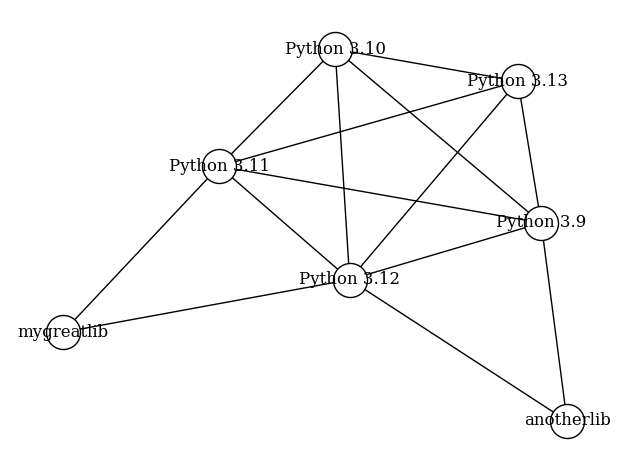

In [ ]:
from mis import MISInstance

# YOUR TURN: Wrap graph into a MISInstance

instance = ...

instance.draw()

## Solving

`mis` provides a _quantum solver_ ­-- and many ways to use it.

preprocessing - current kernel size is 7


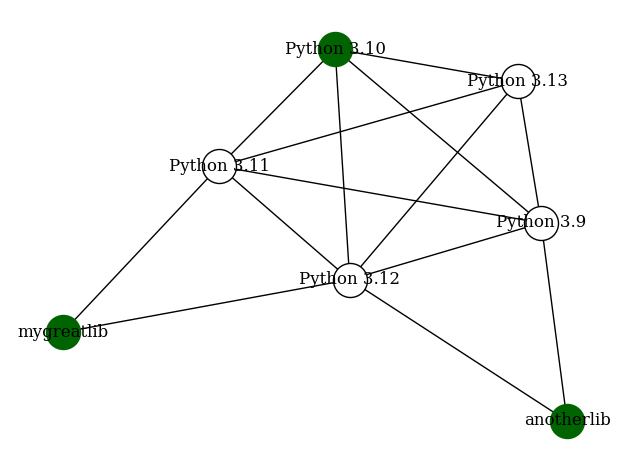

In [6]:
from mis import MISSolver, SolverConfig, BackendConfig

config = SolverConfig(
    # Pick a reasonable quantum emulator.
    backend=BackendConfig(),
    max_number_of_solutions=10,
)

# Note: If you don't pick a config, it will use non-quantum solving.
solver = MISSolver(instance, config)
solutions = solver.solve()

# Then draw all the solutions!
for s in solutions:
    s.draw()

...and that's it.

In many cases, that's all you need to use this library.

> ### Your turn
>
> There's something wrong with `solutions`. What is it?

...that's because we're cheating (also, a bugfix that we haven't merged yet).



---

## Peeking behind the curtain

### Compiling to quantum

- We embed/compile the graph as (physical) atoms.
- One node => one atom.
- One edge => atoms must be close enough.
- Energy states ensure that each atom behaves as one qubit.
- A quantum emulator simulates the quantum mechanics of these atoms.
- Quantum mechanics are (very) non-deterministic.

**Corollary** Not all graphs can be embedded/compiled to a QPU/emulator.

> #### Your turn
>
> What are the limitations you may encounter running `mis` on an emulator?
>
> What are the limitations you may encounter running `mis` on a QPU?

### Limiting qubit usage (opt-out)

This library uses a graph pre-processor to simplify the graph before embedding it.

Let's experiment.

> #### Your turn
>
> 1. Deactivate the pre-processor in `SolverConfig`.
> 2. Does it affect the results? Why?
> 3. Try adding new constraints.
> 4. How many constraints before your computer cannot run the problem anymore?
> 5. Why?

### Using more qubits (opt-in)

1. use a physical QPU;
2. use an optimized emulator;
3. use a HPC cluster emulator.

> #### Your turn
>
> 1. Use [`BackendConfig(backend=BackendType.EMUMPS)`](https://pasqal-io.github.io/maximum-independent-set/latest/api/mis/pipeline/config/#mis.pipeline.config.BackendConfig) to use a GPU-optimized emulator.
> 2. How many constraints before your computer cannot run the problem anymore?

### Limiting sensitivity to positions (opt-in)

Some configurations don't map well to _geometric_ constraints.

> #### Your turn
>
> How could we improve this?

If you wish to experiment, that's `SolverConfig(method=MethodType.GREEDY)`.

---
## Where do we go from here?

### Problem variants

- [Graph coloring](https://pasqal-io.github.io/maximum-independent-set/latest/tutorial%204%20-%20An%20application%20of%20MIS%20-%20Solving%20a%20Graph%20Coloring%20problem/)
- [Boolean satisfiability](https://pasqal-io.github.io/maximum-independent-set/latest/tutorial%203%20-%20An%20application%20of%20MIS%20-%20Solving%20the%203SAT%20problem/)
- etc.

### Challenge!

- [Pasqal Theater Festival](https://github.com/pasqal-io/quantum-summer-lab-2025/tree/main/challenge/pasqal-theater-festival) -- and win QPU time!

### ...and more

- Weighted Maximum Independent Set (soon)

---

## References

1. Source, documentation, tutorials: https://github.com/pasqal-io/maximum-independent-set/ .
2. The Pasqal community: https://join.slack.com/t/pasqal-community/shared_invite/zt-3c7awg903-F7RYBucMMj~bZkUkoXeklQ .
3. More Pasqal software, access to QPUs, etc : https://community.pasqal.com/ .